In [1]:
import os
import sys
#path
sys.path.insert(0,os.path.join("/net/theorie/auto/scratch/amber.klimke/Programs/SherpaResummerPlugin/Scripts"))
sys.path.insert(0,os.path.join("/home/amber.klimke/Documents/Masterarbeit/master"))
sys.path.insert(0,os.path.join("/home/amber.klimke/Documents/Masterarbeit/Zqq_3j/MC/FO"))


In [2]:
import os
import sys
#path
sys.path.insert(0,os.path.join("/net/theorie/auto/scratch1/amber.klimke/Programs/SherpaResummerPlugin/Scripts"))
sys.path.insert(0,os.path.join("/home/amber.klimke/Documents/Masterarbeit/master"))
import Resum.Sigma as resum
import Resum.utils as rutils
import Resum.MatchingSchemes as match
Multiplicative = match.Multiplicative
Additive = match.Additive
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
#import yoda
#from Resum.yoda_utils import *
import math as m
import random as r
%load_ext autoreload
%autoreload 2
import difflib
import pandas as pnd
#import yoda
import resummation_class as my_rs

In [3]:
filesBB =  {'NLL':rutils.ReadFile('NLLFC1.dat.gz'),
    'LO':rutils.ReadFile('LOFC1_RS.dat.gz')
           }

variations = [[[],['CENTRAL']],
              #[["xL=0.5"],['CENTRAL']],
              #[["xL=2"],['CENTRAL']],
             # [[],['MUR=0.5__MUF=1__LHAPDF=-1']],
             # [[],['MUR=2__MUF=1__LHAPDF=-1']],
              
             ]
#dists = resum.CumulantObservableDict(['BL','CL','ML','TL','WL','F0','F1','F2','F3'],filesBB,variations,
dists = resum.CumulantObservableDict(['TL','FC1','FC2','FC3'],filesBB,variations,
                                       transformX=lambda x: np.log(x))
#dists.update(resum.CumulantObservableDict(['Y3'],filesBB,variations,rebin=4))

fullnames = {'BL': 'TotBroad',
             'CL': 'CParameter',
             'ML': 'HeavyJetMass',
             'TL': 'Thrust',
             'WL': 'WideBroad',
             'Y3': 'Y3_Durham',
             'FC1': 'FractionalEnergyCorrelation',
             'FC2': 'FractionalEnergyCorrelation2',
             'FC3': 'FractionalEnergyCorrelation3'
            }


b_values={"TL": 1, 'FC1': 0.5,'FC2':0,'FC3':-0.5}
files =  {'NLL':rutils.ReadFile('NLLFC1.dat.gz')}

variations = [[[],['CENTRAL']],
              #[["xL=0.5"],['CENTRAL']],
              #[["xL=2"],['CENTRAL']],
             # [[],['MUR=0.5__MUF=1__LHAPDF=-1']],
             # [[],['MUR=2__MUF=1__LHAPDF=-1']],
              
             ]
dists1 = resum.CumulantObservableDict(['TL','FC1','FC2','FC3'],files,variations,
                                       transformX=lambda x:np.log(x),rebin=2)

dists_gg = resum.CumulantObservableDict(['TL','FC1','FC2','FC3'],files,variations,
                                       transformX=lambda x:np.log(x),rebin=2)

CF = 4/3
CA = 3
nf = 5
beta0 = (11-2/3*nf)/2

for O in dists1:
    print(O)
    O2=O
    if O=="TL":
          O2="T" 
    try:                                 ##replace B with E for q, B for b and G for g  
        lo = np.loadtxt(f'FO/hbb_3j/B0000.y1d8.iL0.Log{O2}.dat').T[2] # hier für Zqq und deine Observablen anpassen
        nlo = np.loadtxt(f'FO/hbb_3j/B0000.y1d8.iN0.Log{O2}.dat').T[2]
        for var in dists1[O]:
           # s1=2*0.75*CF # Prozess spezifisch,         das ist der richtige Wert für Zqq
            s1=17/2*CF+3*CF*np.log(91.2**2/125**2)
            ## Hbb
            dists1[O][var].addLOArray(lo,s1,multSigma0=True,multAsBar=True)
            dists1[O][var].addNLOArray(nlo,lo,multSigma0=True,multAsBar=True)
    except ValueError:
        print('impossible')


for O in dists_gg:
    print(O)
    O2=O
    if O=="TL":
          O2="T" 
    try:                                 ##replace B with E for q, B for b and G for g  
        lo = np.loadtxt(f'FO/hgg_3j/G0000.y1d8.iL0.Log{O2}.dat').T[2] # hier für Zqq und deine Observablen anpassen
        nlo = np.loadtxt(f'FO/hgg_3j/G0000.y1d8.iN0.Log{O2}.dat').T[2]
        for var in dists1[O]:
           # s1=2*0.75*CF # Prozess spezifisch,         das ist der richtige Wert für Zqq
            s1=95/6*CA-7/3*nf +2*beta0*np.log(91.2**2/125**2) ## H->gg
            dists_gg[O][var].addLOArray(lo,s1,multSigma0=True,multAsBar=True)
            dists_gg[O][var].addNLOArray(nlo,lo,multSigma0=True,multAsBar=True)
    except ValueError:
        print('impossible')



def d(x):
    return x[1:]-x[:len(x)-1]

def rescale(array,offset=0):
    arr2=(array-np.min(array))
    return arr2/np.max(arr2[offset:]), np.max(arr2[offset:])


import resummation_class as my_rs
#print(dists1['TL']["CENTRAL"]('LO'))



TL
FC1
FC2
FC3
TL
FC1
FC2
FC3


In [4]:
print(dists1['TL']['CENTRAL']('LO'))

[-124973.20084547 -121253.54789775 -117574.74693648 -113937.55588349
 -110340.45889511 -106782.84963389 -103266.39552785  -99790.33865516
  -96354.83060019  -92958.88606455  -89604.55143719  -86289.62874481
  -83015.70962323  -79782.11194283  -76588.75991141  -73435.72932115
  -70323.77809389  -67252.22409999  -64221.21892379  -61229.77726694
  -58280.09710273  -55369.7530813   -52500.71579943  -49670.71149161
  -46882.31709206  -44133.78938059  -41426.56840866  -38759.36570917
  -36133.09078831  -33546.07621805  -31000.67155607  -28495.43675089
  -26030.67497125  -23606.68938586  -21222.94944947  -18879.90991515
  -16576.88865327  -14314.94675439  -12093.09892012   -9911.95148794
   -7771.73183438   -5671.83362199   -3612.40843514   -1593.68365036
     384.34073233    2322.19525822    4218.81883676    6075.12097412
    7890.64691722    9665.54825042   11399.90076591   13093.40129495
   14746.20142191   16358.37693897   17929.77626177   19460.70255903
   20950.49643878   22399.55959957

TL


/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:73: RuntimeWarning: invalid value encountered in log
  (a_l - 2*lamb)*np.log(1-2*lamb/a_l)
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:80: RuntimeWarning: invalid value encountered in log
  self.K/(4*np.pi**2*self.beta_0**2)*((a_l+b_l)*np.log(1 - 2*lamb /(a_l+b_l)) - a_l*np.log(1 - 2*lamb/a_l))
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:82: RuntimeWarning: invalid value encountered in log
  a_l/2 * np.log(1-2*lamb/a_l)**2 - (a_l+b_l) /
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:84: RuntimeWarning: invalid value encountered in log
  + a_l*np.log(1-2*lamb/a_l) - (a_l+b_l)*np.log(1-2*lamb/(a_l+b_l))
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:41: RuntimeWarning: invalid value encountered in log
  return -1/(np.pi*self.beta_0)*np.log(1-2*lamb)


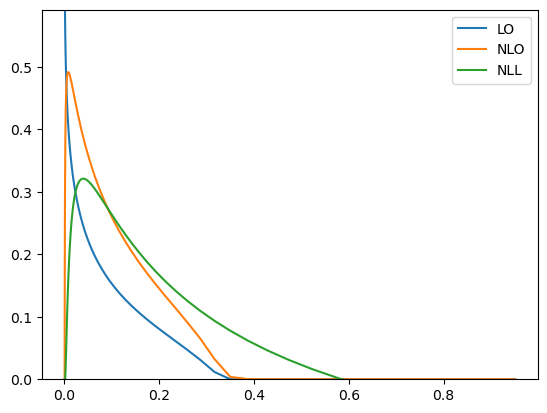

FC1


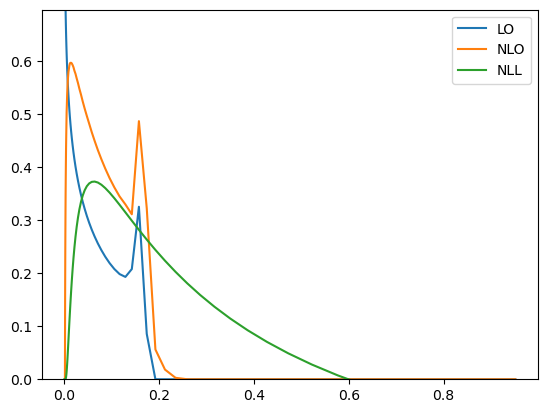

FC2


/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:60: RuntimeWarning: invalid value encountered in log
  2*lamb/a_l+np.log(1-2*lamb/a_l)
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:64: RuntimeWarning: invalid value encountered in log
  np.log(1-2*lamb/a_l)+ 2/a_l*(lamb/(1-2/a_l*lamb)))  -self.beta_1/(2*np.pi*self.beta_0**3)*(
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:65: RuntimeWarning: invalid value encountered in log
  1/2*np.log(1-2*lamb/a_l)**2  +  (np.log(1-2*lamb/a_l)+2/a_l*lamb)/(1-2*lamb/a_l)
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:169: RuntimeWarning: divide by zero encountered in log
  res += np.log( self.additive_F(L) )
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:169: RuntimeWarning: invalid value encountered in log
  res += np.log( self.additive_F(L) )


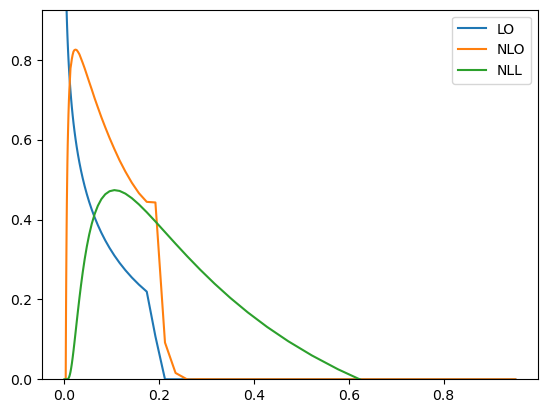

FC3


/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:74: RuntimeWarning: invalid value encountered in log
  - (a_l+b_l - 2*lamb)*np.log(1-2*lamb/(a_l+b_l))
/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:83: RuntimeWarning: invalid value encountered in log
  2*np.log(1-2*lamb/(a_l+b_l))**2


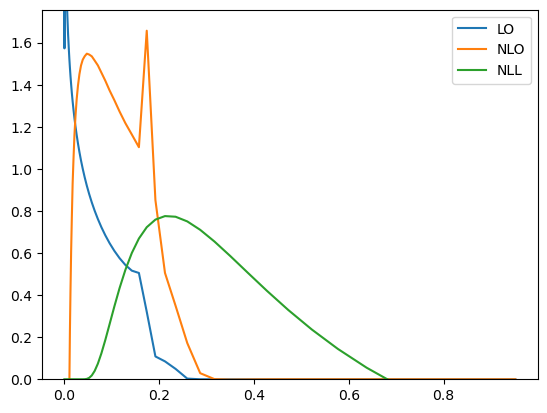

In [5]:
for O in dists1:
    print(O)
    dist=dists1[O]['CENTRAL']
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(dist.BinMids,0,-10)
    spacing=1/(v[2:]-v[1:100])
    a.run(np.exp(v)[1:],deltaF=spacing,diff=False)
    plt.plot(np.exp(dist.BinMids),dist('D','LO')/dist.sigma0,label='LO')
    plt.plot(np.exp(dist.BinMids),dist('D','NLO')/dist.sigma0,label='NLO')
    plt.plot(np.exp(dist.BinMids)[1:],a.diff,label='NLL')
    plt.ylim(0, np.max(dist('D','NLO'))/dist.sigma0+0.1)
    plt.legend()
    plt.show()

TL


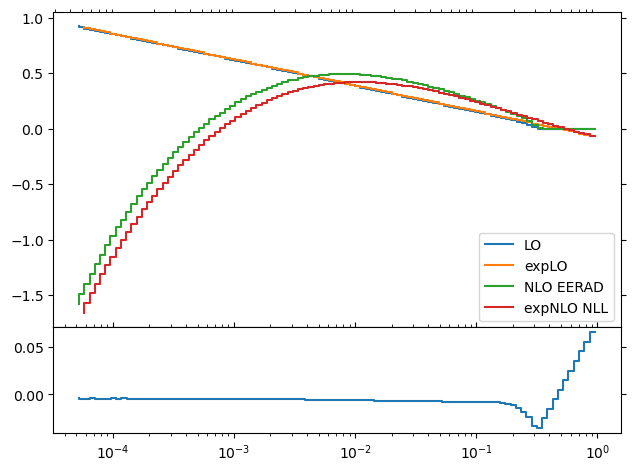

FC1


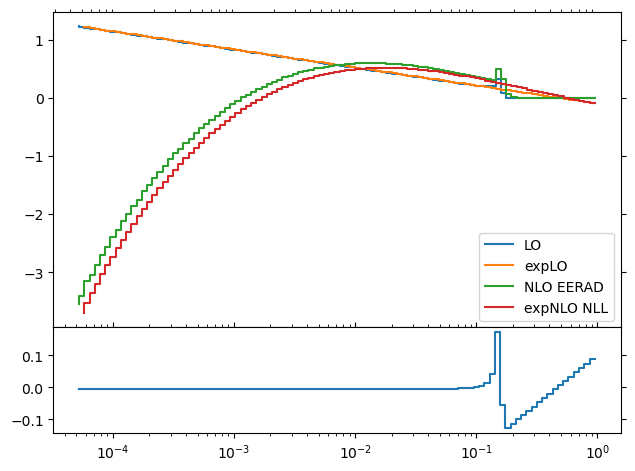

FC2


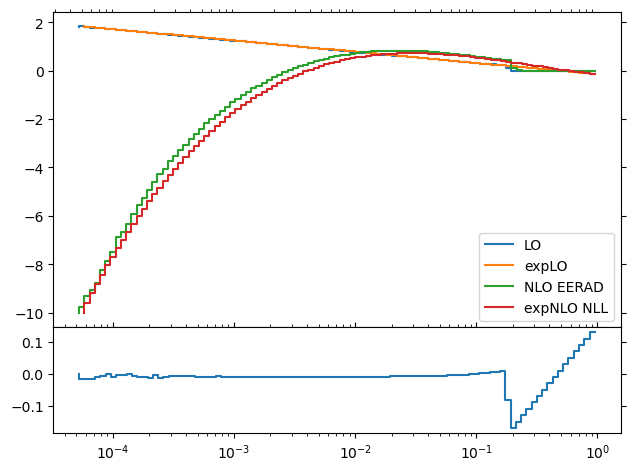

FC3


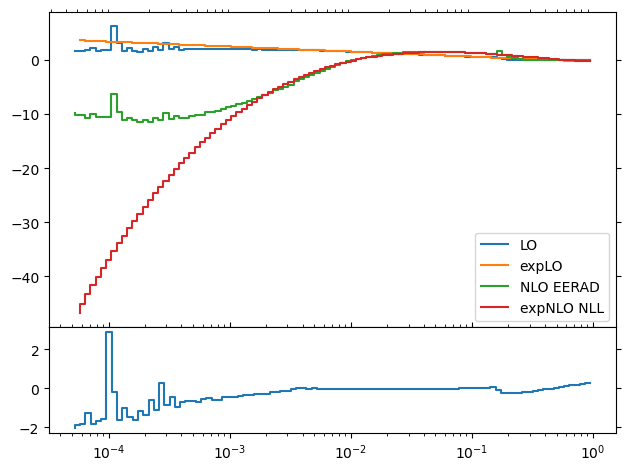

In [20]:
##############  Expansion Test  ################

for O in dists1:  
    print(O)
    dist=dists1[O]["CENTRAL"]

    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    a.nf=5
    a.alpha=0.1179
    a.update()

    v=np.insert(np.exp(dist.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('D','LO')

    fig,ax= plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout()

    ax[0].semilogx(np.exp(dist.BinMids),y1/dist.sigma0,drawstyle='steps',label='LO')
   # ax[0].semilogx(np.exp(dist.BinMids),dist('D','expNLO')/dist.sigma0,drawstyle='steps',label='Sherpas NLL')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('D','NLO')


 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist.BinMids[1::]-dist.BinMids[:99])
    a.run_FO_symbolic(v[1:],deltaF=spacing,diff=False)
    ax[0].semilogx(np.exp(dist.BinMids)[1:],a.diff,drawstyle='steps',label='expLO')
    ax[0].semilogx(np.exp(dist.BinMids),y2/dist.sigma0,drawstyle='steps',label=r'NLO EERAD')
    
    A_remain=(-a.diff+y1[1:]/dist.sigma0)
    dA=(A_remain[1:]-A_remain[:len(a.diff)-1])/(v[3:]-v[2:len(v)-1])*v[3:]
    a.run_FO_symbolic(v[1:],N=2,deltaF=spacing,diff=False)
    
    ax[0].semilogx(np.exp(dist.BinMids)[1:],a.diff,drawstyle='steps',label='expNLO NLL')
    ax[0].set_xticks([])
    ax[0].yaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
    #ax[1].set_ylim(-0.02,0.07)
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
    plt.subplots_adjust(hspace=0)
    ax[1]=plt.semilogx(v[2:],A_remain,drawstyle='steps')
    ax[0].legend()
  
   # plt.xlim(0,1)
    plt.show()


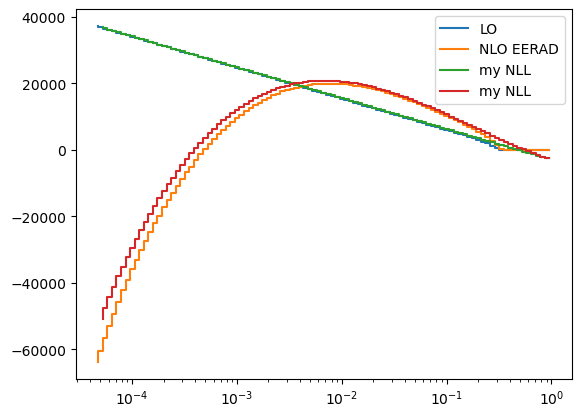

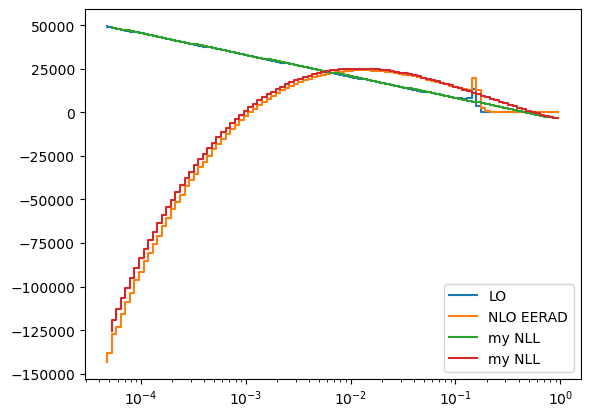

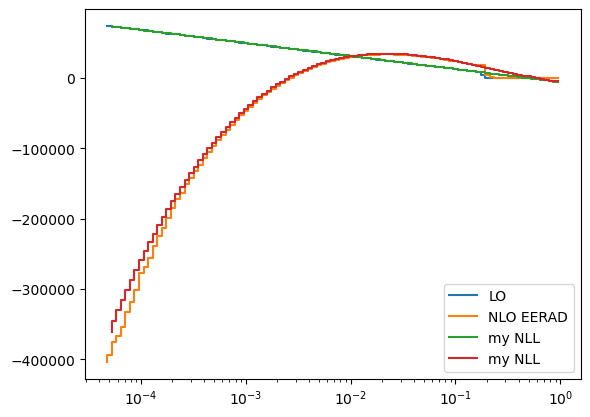

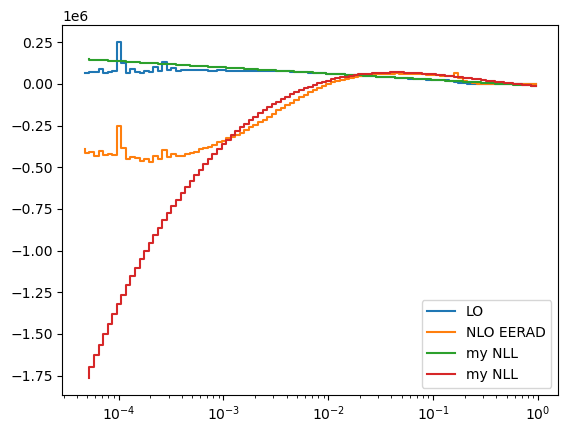

In [7]:
##############  Expansion Test  ################

for O in dists1:    
    dist=dists1[O]["CENTRAL"]

    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(np.exp(dist.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('D','LO')

    plt.semilogx(np.exp(dist.BinMids),y1,drawstyle='steps',label='LO')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('D','NLO')


 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist.BinMids[1::]-dist.BinMids[:99])
    a.nf=1
    a.update()
    a.run_FO_symbolic(v[1:],deltaF=spacing,diff=False)
    plt.semilogx(np.exp(dist.BinMids),y2,drawstyle='steps',label=r'NLO EERAD')
  

    plt.semilogx(np.exp(dist.BinMids)[1:],dist.sigma0*a.diff,drawstyle='steps',label='my NLL')


    a.run_FO_symbolic(v[1:],N=2,deltaF=spacing,diff=False)
    plt.semilogx(np.exp(dist.BinMids)[1:],dist.sigma0*a.diff,drawstyle='steps',label='my NLL')
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
  #  plt.ylim(0,10000+np.max(dist('D','expLO')))
    plt.legend()
   # plt.xlim(0,1)
    plt.show()


TL


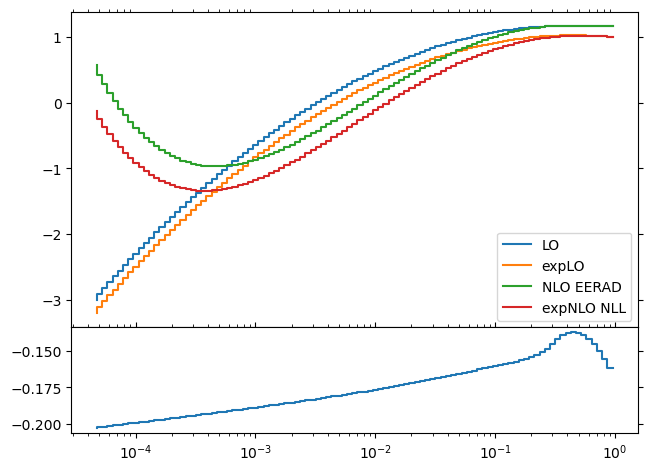

FC1


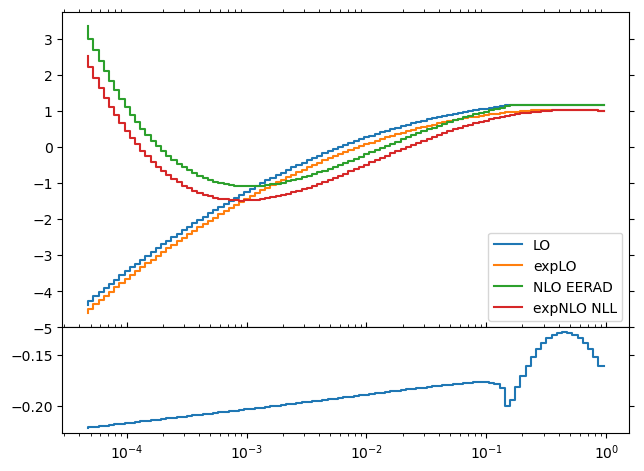

FC2


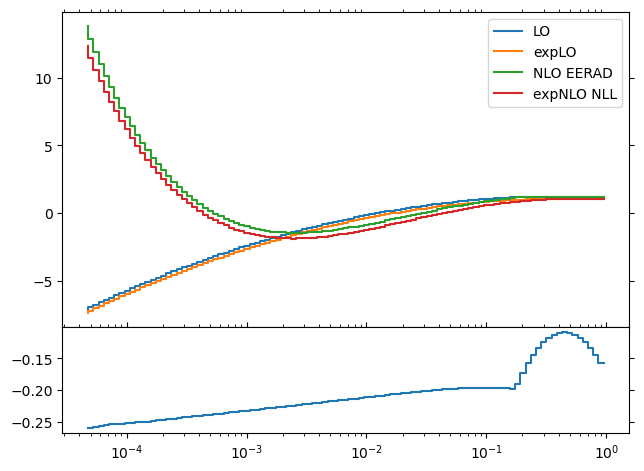

FC3


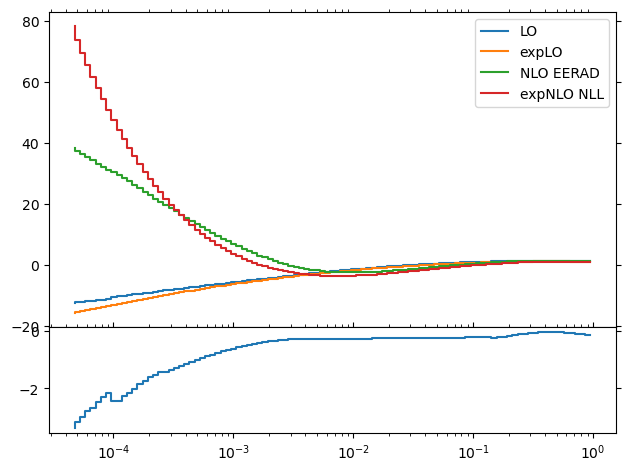

In [19]:
##############  Expansion Test  ################

for O in dists1:  
    print(O)
    dist=dists1[O]["CENTRAL"]

    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    a.nf=1
    a.alpha=0.1179
    a.update()

    v=np.insert(np.exp(dist.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('LO')[1:]

    fig,ax= plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout()

    ax[0].semilogx(np.exp(dist.BinMids),y1/dist.sigma0,drawstyle='steps',label='LO')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('NLO')[1:]


 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist.BinMids[1::]-dist.BinMids[:99])
    a.run_FO_symbolic(v[1:],deltaF=spacing,diff=False)
    
    ax[1].semilogx(v[1:],a.resum-y1/dist.sigma0,drawstyle='steps')
    
    ax[0].semilogx(np.exp(dist.BinMids),a.resum,drawstyle='steps',label='expLO')
    ax[0].semilogx(np.exp(dist.BinMids),y2/dist.sigma0,drawstyle='steps',label=r'NLO EERAD')
    
    A_remain=-a.diff+dist('D','LO')[1:]/dist.sigma0
    dA=(A_remain[1:]-A_remain[:len(a.diff)-1])/(v[3:]-v[2:len(v)-1])*v[3:]
  
    a.run_FO_symbolic(v[1:],N=2,deltaF=spacing,diff=False)
    
    ax[0].semilogx(np.exp(dist.BinMids),a.resum,drawstyle='steps',label='expNLO NLL')
    ax[0].set_xticks([])
    ax[0].yaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
   # ax[1].set_ylim(-0.01,0.3)
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
    plt.subplots_adjust(hspace=0)

    ax[0].legend()
  
   # plt.xlim(0,1)
    plt.show()


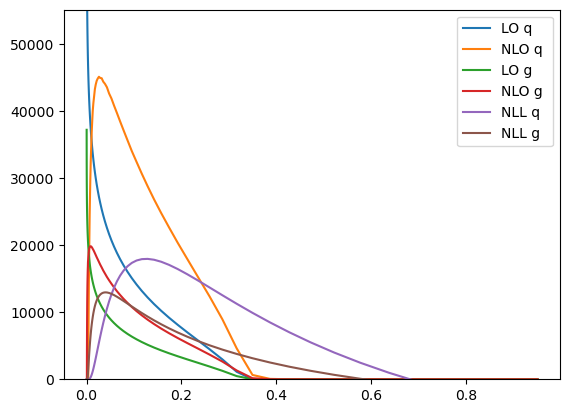

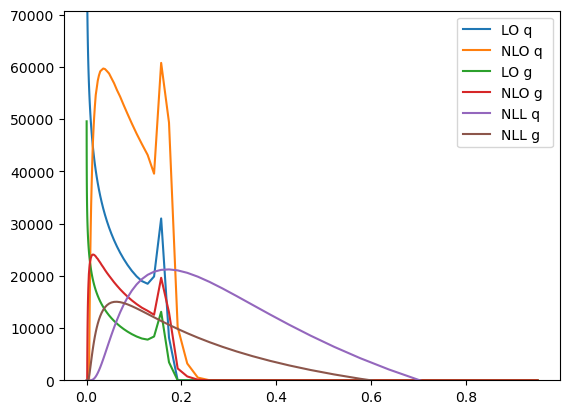

/home/jovyan/Master/MasterarbeitNotebooks/resummation_class.py:110: RuntimeWarning: divide by zero encountered in divide
  result=np.exp(-R*np.euler_gamma)/gamma(1+R)


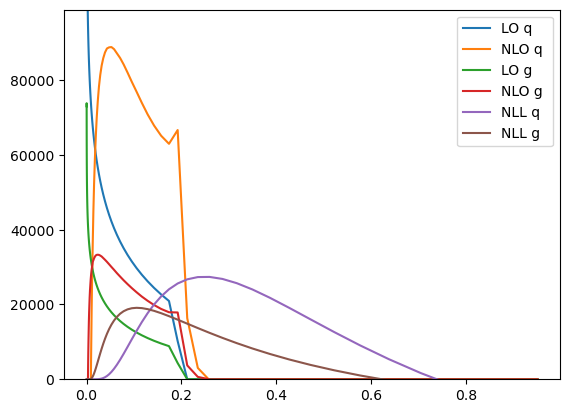

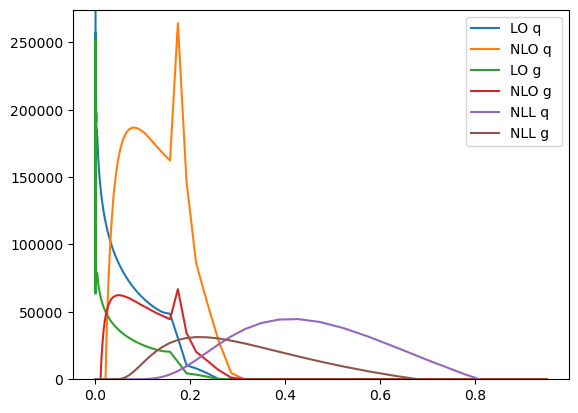

In [9]:
for O in dists_gg:
    dist=dists_gg[O]['CENTRAL']
    dist2=dists1[O]['CENTRAL']
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1],['g','g'])
    b=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1],['q','q'])
    v=np.insert(dist.BinMids,0,-10)
    spacing=1/(v[2:]-v[1:100])
    a.run(np.exp(v)[1:],deltaF=spacing,diff=False)
    b.run(np.exp(v)[1:],deltaF=spacing,diff=False)
    plt.plot(np.exp(dist.BinMids),dist('D','LO'),label='LO q')
    plt.plot(np.exp(dist.BinMids),dist('D','NLO'),label='NLO q')
    plt.plot(np.exp(dist.BinMids),dist2('D','LO'),label='LO g')
    plt.plot(np.exp(dist.BinMids),dist2('D','NLO'),label='NLO g ')
    plt.plot(np.exp(dist.BinMids)[1:],dist.sigma0*a.diff,label='NLL q')
    plt.plot(np.exp(dist.BinMids)[1:],dist.sigma0*b.diff,label='NLL g')
    plt.legend()
    plt.ylim(0,max(dist('D','NLO'))+10000)
    plt.show()

TL


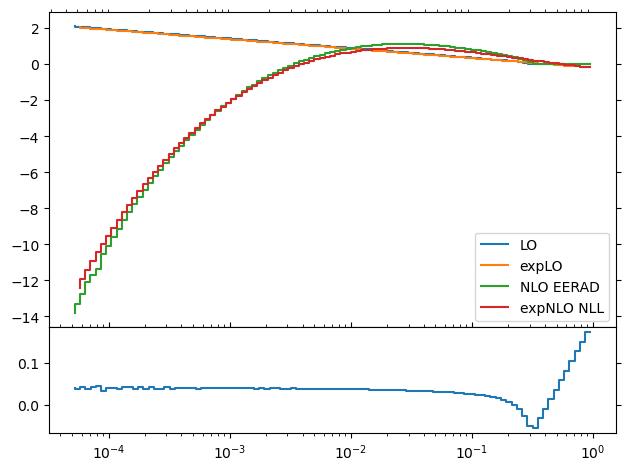

FC1


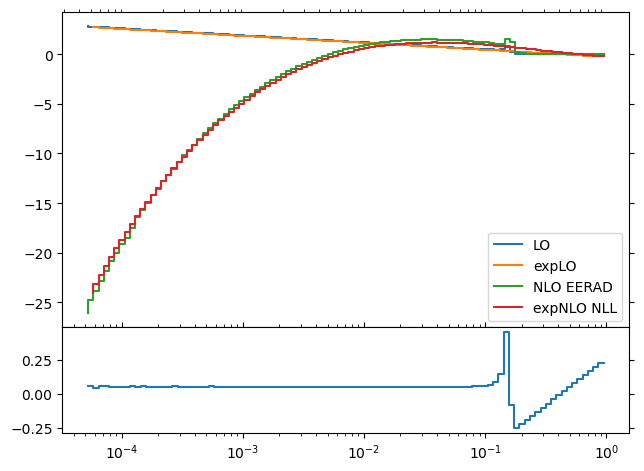

FC2


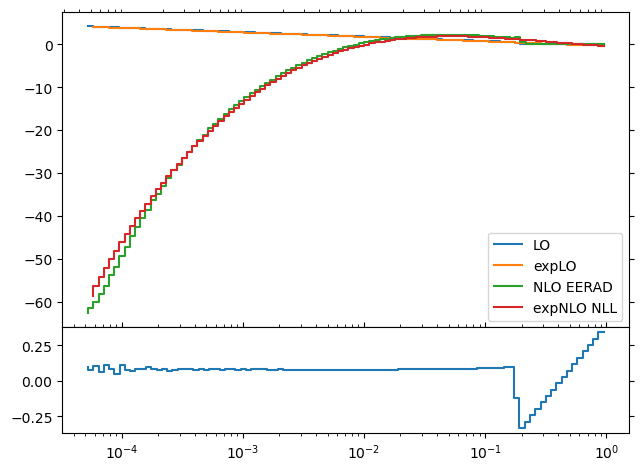

FC3


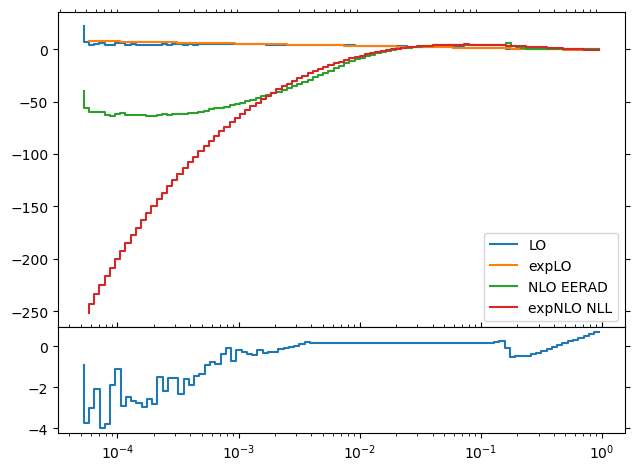

In [10]:
##############  Expansion Test  ################

for O in dists1:  
    print(O)
    dist=dists_gg[O]["CENTRAL"]

    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1],['g','g'])
    a.nf=1
    a.alpha=0.1179
    a.update()

    v=np.insert(np.exp(dist.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('D','LO')

    fig,ax= plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout()

    ax[0].semilogx(np.exp(dist.BinMids),y1/dist.sigma0,drawstyle='steps',label='LO')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('D','NLO')


 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist.BinMids[1::]-dist.BinMids[:99])
    a.run_FO_symbolic(v[1:],deltaF=spacing,diff=False)
    
    ax[1].semilogx(v[2:],-a.diff+y1[1:]/dist.sigma0,drawstyle='steps')
    
    ax[0].semilogx(np.exp(dist.BinMids)[1:],a.diff,drawstyle='steps',label='expLO')
    ax[0].semilogx(np.exp(dist.BinMids),y2/dist.sigma0,drawstyle='steps',label=r'NLO EERAD')
    
    A_remain=-a.diff+dist('D','LO')[1:]/dist.sigma0
    dA=(A_remain[1:]-A_remain[:len(a.diff)-1])/(v[3:]-v[2:len(v)-1])*v[3:]
  
    a.run_FO_symbolic(v[1:],N=2,deltaF=spacing,diff=False)
    
    ax[0].semilogx(np.exp(dist.BinMids)[1:],a.diff,drawstyle='steps',label='expNLO NLL')
    ax[0].set_xticks([])
    ax[0].yaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
   # ax[1].set_ylim(-0.01,0.3)
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
    plt.subplots_adjust(hspace=0)

    ax[0].legend()
  
   # plt.xlim(0,1)
    plt.show()


TL


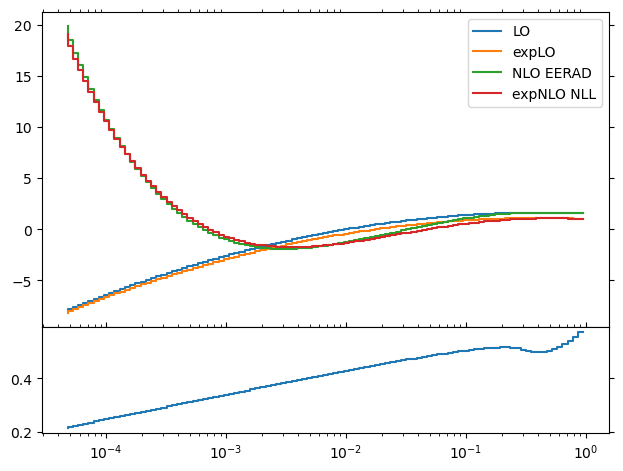

FC1


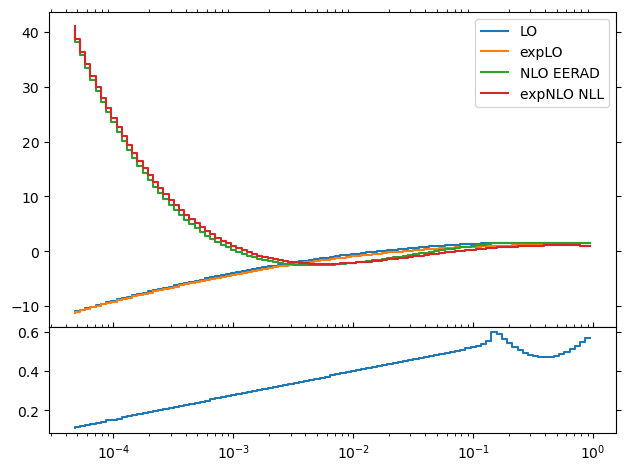

FC2


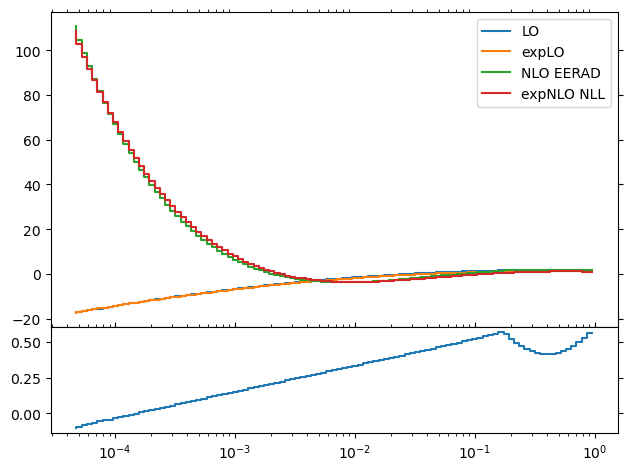

FC3


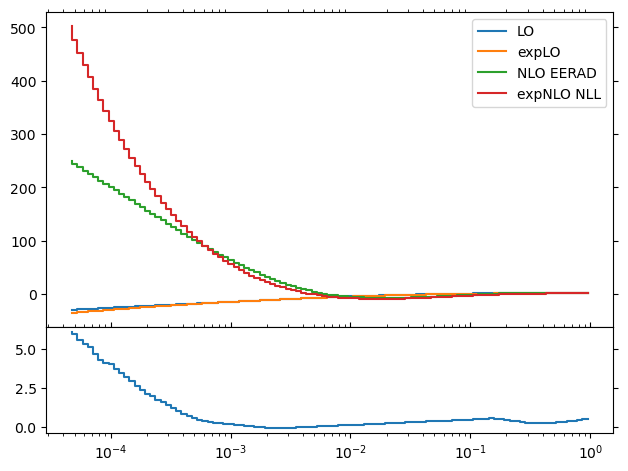

In [17]:
##############  Expansion Test  ################

for O in dists_gg:  
    print(O)
    dist=dists_gg[O]["CENTRAL"]

    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1],['g','g'])
    a.nf=1
    a.alpha=0.1179
    a.update()

    v=np.insert(np.exp(dist.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('LO')[1:]

    fig,ax= plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout()

    ax[0].semilogx(np.exp(dist.BinMids),y1/dist.sigma0,drawstyle='steps',label='LO')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('NLO')[1:]


 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist.BinMids[1::]-dist.BinMids[:99])
    a.run_FO_symbolic(v[1:],deltaF=spacing,diff=False)
    
    ax[1].semilogx(v[1:],-a.resum+y1/dist.sigma0,drawstyle='steps')
    
    ax[0].semilogx(np.exp(dist.BinMids),a.resum,drawstyle='steps',label='expLO')
    ax[0].semilogx(np.exp(dist.BinMids),y2/dist.sigma0,drawstyle='steps',label=r'NLO EERAD')
    
    A_remain=-a.diff+dist('D','LO')[1:]/dist.sigma0
    dA=(A_remain[1:]-A_remain[:len(a.diff)-1])/(v[3:]-v[2:len(v)-1])*v[3:]
  
    a.run_FO_symbolic(v[1:],N=2,deltaF=spacing,diff=False)
    
    ax[0].semilogx(np.exp(dist.BinMids),a.resum,drawstyle='steps',label='expNLO NLL')
    ax[0].set_xticks([])
    ax[0].yaxis.set_ticks_position('both')
    ax[1].yaxis.set_ticks_position('both')
    ax[0].xaxis.set_ticks_position('both')
    ax[1].xaxis.set_ticks_position('both')
   # ax[1].set_ylim(-0.01,0.3)
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
    plt.subplots_adjust(hspace=0)

    ax[0].legend()
  
   # plt.xlim(0,1)
    plt.show()
